## German data set

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report

In [96]:
df = pd.read_csv("Data_set/data.csv")

In [97]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [103]:
X = df.drop(['Creditability'],axis = 1)
X['Telephone'][X['Telephone']==2]=0
X['Foreign Worker'][X['Foreign Worker']==2]=0
y = df['Creditability'].copy()
y[y==0] = -1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle = True, random_state=10)

KeyError: "['Creditability'] not found in axis"

## Loan Bank Data

In [126]:
df = pd.read_excel("Data_set/OvD.xlsx")

In [127]:
df = df.loc[1:,:]
df1 = df.drop(['Date of disbursment ', 'Kod','Birthday (day/monthly/year)','Fido', 'NRP', 'Unnamed: 2',
       'Bank of Albania sector_16 (individuals)', 'Maturity date', 'Birthday (day/monthly/year).1', 'Monthly Installment of the loan-Converdted',
         'Other installments of other loans_Converted', "Type of Loan (if it's loan or overdraft)"],axis=1)
df1['Gender'][df1['Gender']=='F']=0
df1['Gender'][df1['Gender']=='M']=1

y = df1['Loan classification'].copy()
y[y==1] = -1
y[y==0] = 1

X = df1.drop(['Loan classification'],axis = 1)

In [172]:
from collections import Counter
X1 = X.astype('float64')
X1 = np.array(X1)
lable = y.values
X1 = (X1 - X1.mean())/X1.std()

data = np.append(X1,y[:,None],axis=1)

print('Clients %s'%Counter(lable))

Train_data,test = train_test_split(data, test_size=0.3,shuffle = True,random_state = 10)

x_test = test[:,:-1]
x_test = x_test.astype('float')
y_test = test[:,-1]
y_test=y_test.astype('int')
x_train = Train_data[:,:-1]
x_train = x_train.astype('float')
y_train = Train_data[:,-1]
y_train=y_train.astype('int')

Clients Counter({1: 3494, -1: 235})


##### Random Forest

In [179]:
from imblearn.over_sampling import SVMSMOTE
x_train_ovr, y_train_ovr = SVMSMOTE(random_state=42).fit_sample(x_train, y_train)
rf = RandomForestClassifier()
rf.fit(x_train_ovr, y_train_ovr)
y_pred = rf.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))

print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(x_train, y_train),
                                                                        rf.score(x_test, y_test)))
importances=rf.feature_importances_
print('Each axis corresponds to the importance feature：\n',importances)
indices = np.argsort(importances)[::-1]# a[::-1]让a逆序输出
print('Index of the rank：\n',indices)


accuracy_score 0.9285075960679178
              precision    recall  f1-score   support

          -1       0.40      0.03      0.05        79
           1       0.93      1.00      0.96      1040

    accuracy                           0.93      1119
   macro avg       0.67      0.51      0.51      1119
weighted avg       0.89      0.93      0.90      1119

AUC: 0.5112159201557935
R^2 Training Score: 1.00 
R^2 Validation Score: 0.93
Each axis corresponds to the importance feature：
 [6.32824039e-02 0.00000000e+00 1.59603517e-05 5.43462675e-02
 1.47858221e-01 4.16004024e-02 5.84445755e-02 7.03205102e-02
 3.83141450e-02 1.27299039e-01 4.71139345e-02 8.67294728e-02
 8.44361543e-02 4.08313021e-02 3.70430064e-02 6.88082849e-02
 3.35563205e-02]
Index of the rank：
 [ 4  9 11 12  7 15  0  6  3 10  5 13  8 14 16  2  1]


In [142]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

 1) Gender                         0.151522
 2) Employment Type                0.122047
 3) Residential Status             0.088868
 4) Credit Registry Information    0.079457
 5) Monthly Income                 0.070814
 6) Education Type                 0.067685
 7) Approved loan                  0.066835
 8) Age                            0.054784
 9) Reference                      0.048883
10) Current years at job           0.045934
11) Number of family members       0.044360
12) Marital Status                 0.043948
13) Monthly Installment of the loan 0.038994
14) Number of years at the current address 0.038863
15) Other installments of other loans 0.036983
16) Currency                       0.000022
17) Duration (in months)           0.000000


No handles with labels found to put in legend.


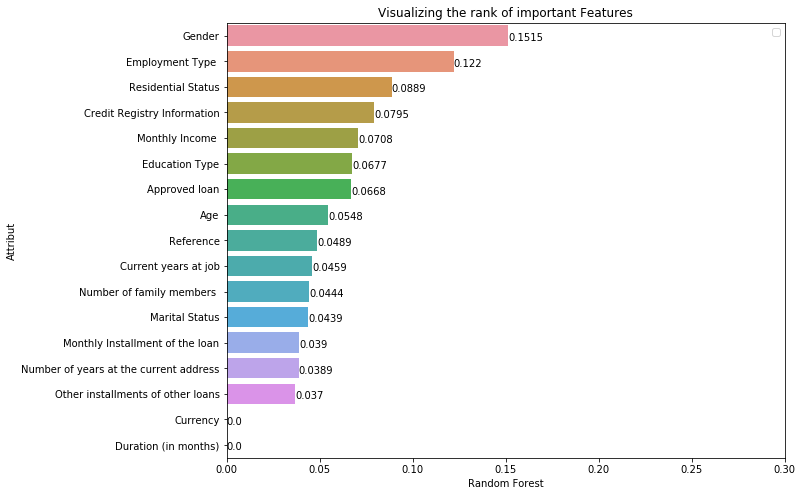

In [143]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 0.3))
#plt.ylim((0, 1))
plt.xlabel('Random Forest')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

##### Coefficients as Feature Importance
Linear Regression Feature Importance  
Logistic Regression Feature Importance

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
# fit the model
model.fit(x_train_ovr, y_train_ovr)
y_pred = model.predict(x_test)
y_pred = np.sign(y_pred)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))
# get importance
model.fit(X, y)
importance = model.coef_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

accuracy_score 0.7989276139410187
              precision    recall  f1-score   support

          -1       0.15      0.38      0.21        79
           1       0.95      0.83      0.88      1040

    accuracy                           0.80      1119
   macro avg       0.55      0.61      0.55      1119
weighted avg       0.89      0.80      0.84      1119

AUC: 0.6052580331061344
 1) Currency                       0.142185
 2) Education Type                 0.040329
 3) Residential Status             0.011671
 4) Number of family members       0.006780
 5) Reference                      0.005935
 6) Age                            0.003444
 7) Current years at job           0.003281
 8) Number of years at the current address 0.000387
 9) Monthly Installment of the loan 0.000003
10) Monthly Income                 0.000000
11) Approved loan                  0.000000
12) Duration (in months)           -0.000000
13) Other installments of other loans -0.000000
14) Marital Status           

No handles with labels found to put in legend.


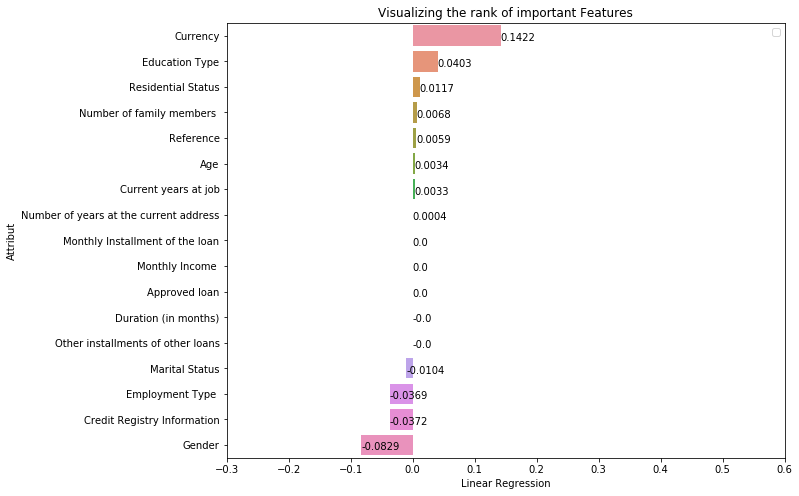

In [150]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((-0.3, 0.6))
#plt.ylim((0, 1))
plt.xlabel('Linear Regression')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

In [151]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(x_train_ovr, y_train_ovr)
y_pred = model.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))

#model.fit(X, y)
# get importance
importance = model.coef_[0]
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

accuracy_score 0.9267202859696158
              precision    recall  f1-score   support

          -1       0.41      0.09      0.15        79
           1       0.93      0.99      0.96      1040

    accuracy                           0.93      1119
   macro avg       0.67      0.54      0.55      1119
weighted avg       0.90      0.93      0.90      1119

AUC: 0.5394961051606622
 1) Monthly Installment of the loan 1.157618
 2) Monthly Income                 0.488896
 3) Age                            0.086390
 4) Current years at job           0.053508
 5) Number of years at the current address 0.043087
 6) Approved loan                  0.017686
 7) Number of family members       -0.004173
 8) Residential Status             -0.004533
 9) Education Type                 -0.005426
10) Marital Status                 -0.005772
11) Currency                       -0.007461
12) Duration (in months)           -0.007470
13) Credit Registry Information    -0.008076
14) Reference              

No handles with labels found to put in legend.


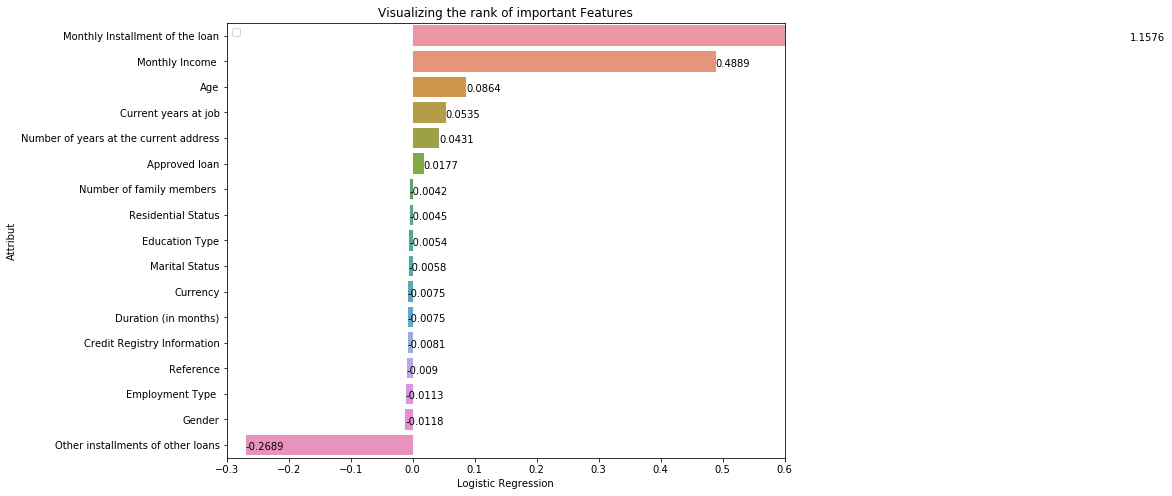

In [152]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((-0.3, 0.6))
#plt.ylim((0, 1))
plt.xlabel('Logistic Regression')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

##### Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x_train_ovr, y_train_ovr)
y_pred = model.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))
model.fit(X, y.astype('int'))
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

accuracy_score 0.8650580875781948
              precision    recall  f1-score   support

          -1       0.11      0.13      0.12        79
           1       0.93      0.92      0.93      1040

    accuracy                           0.87      1119
   macro avg       0.52      0.52      0.52      1119
weighted avg       0.87      0.87      0.87      1119

AUC: 0.5238680623174294
 1) Monthly Income                 0.188029
 2) Current years at job           0.139057
 3) Approved loan                  0.137672
 4) Number of years at the current address 0.120725
 5) Age                            0.113001
 6) Monthly Installment of the loan 0.062805
 7) Number of family members       0.055600
 8) Residential Status             0.047746
 9) Other installments of other loans 0.036002
10) Credit Registry Information    0.032279
11) Marital Status                 0.018486
12) Gender                         0.014256
13) Education Type                 0.011981
14) Employment Type            

No handles with labels found to put in legend.


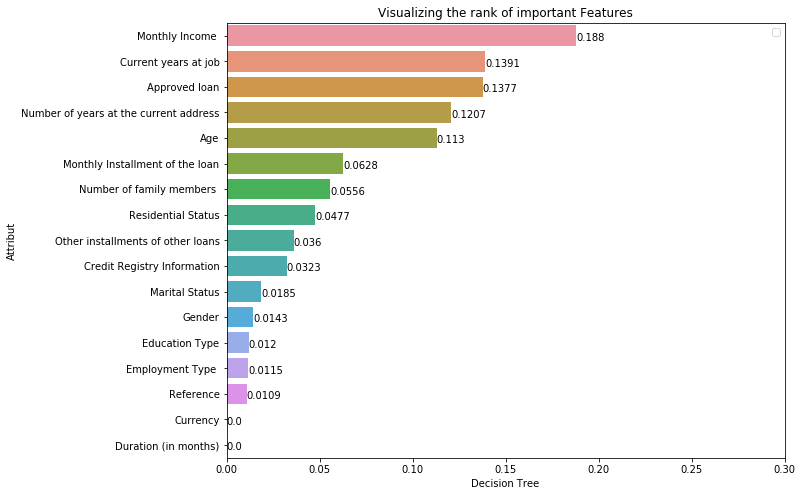

In [162]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 0.3))
#plt.ylim((0, 1))
plt.xlabel('Decision Tree')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

##### Xgboost

In [165]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


In [176]:
from xgboost import XGBRegressor,XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))
y_xgb=y.astype('int').copy()
#y_xgb[y_xgb==-1]=0
model.fit(X.astype('float'),y_xgb)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

accuracy_score 0.9311885612153709
              precision    recall  f1-score   support

          -1       1.00      0.03      0.05        79
           1       0.93      1.00      0.96      1040

    accuracy                           0.93      1119
   macro avg       0.97      0.51      0.51      1119
weighted avg       0.94      0.93      0.90      1119

AUC: 0.5126582278481013
 1) Employment Type                0.092524
 2) Monthly Income                 0.087541
 3) Other installments of other loans 0.086656
 4) Current years at job           0.073260
 5) Education Type                 0.070509
 6) Reference                      0.070296
 7) Gender                         0.067782
 8) Monthly Installment of the loan 0.067529
 9) Approved loan                  0.061869
10) Number of years at the current address 0.061415
11) Credit Registry Information    0.061082
12) Age                            0.058926
13) Residential Status             0.050292
14) Number of family members   

No handles with labels found to put in legend.


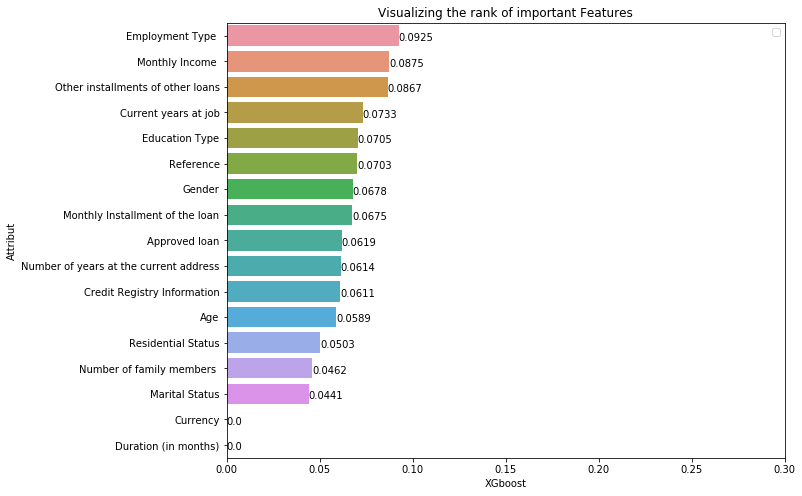

In [177]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 0.3))
#plt.ylim((0, 1))
plt.xlabel('XGboost')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

#### Permutation Feature Importance for Classification

In [182]:
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_ovr, y_train_ovr)
y_pred = clf.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

clf.fit(X, y.astype('int'))
results = permutation_importance(clf,X, y.astype('int'), scoring='accuracy')
importance = results.importances_mean

indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]])))

accuracy_score 0.8579088471849866
              precision    recall  f1-score   support

          -1       0.13      0.18      0.15        79
           1       0.94      0.91      0.92      1040

    accuracy                           0.86      1119
   macro avg       0.53      0.54      0.54      1119
weighted avg       0.88      0.86      0.87      1119

AUC: 0.5434152872444011
 1) Reference                      0.000000
 2) Education Type                 0.000000
 3) Duration (in months)           0.000000
 4) Currency                       0.000000
 5) Age                            0.000000
 6) Gender                         0.000000
 7) Marital Status                 0.000000
 8) Number of family members       0.000000
 9) Number of years at the current address 0.000000
10) Monthly Income                 0.000000
11) Employment Type                0.000000
12) Current years at job           0.000000
13) Residential Status             0.000000
14) Credit Registry Information    

No handles with labels found to put in legend.


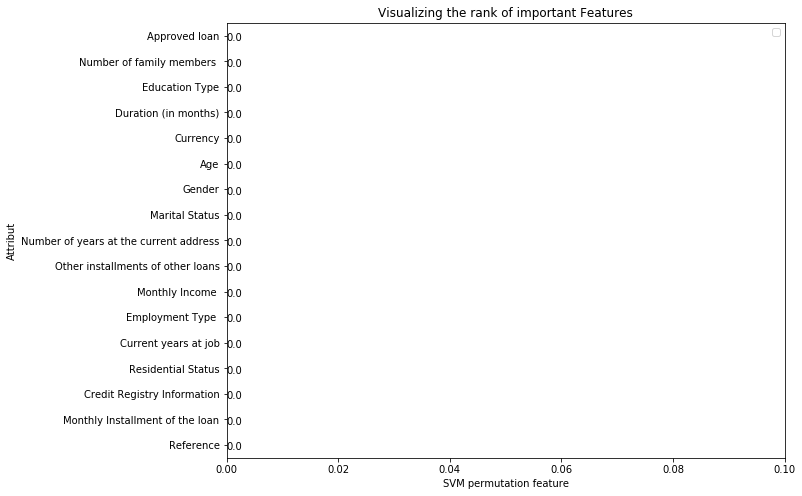

In [181]:
IV = []
for f in range(X.shape[1]):
     IV.append(importance[indices[f]])

feature_imp = []
for f in range(X.shape[1]):
     feature_imp.append(features[indices[f]])

plt.figure(figsize=(10,8))
feature_imp = pd.Series(IV,index=feature_imp).sort_values(ascending=False)

ivlist = pd.Series(IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 0.1))
#plt.ylim((0, 1))
plt.xlabel('SVM permutation feature')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

#### FSVM feature

In [129]:
import FSVM
print('FSVM')
kernel_dict = {'type': 'LINEAR'}
fuzzyvalue = {'type':'Cen','function':'Exp'}

clf = FSVM.FSVM(3,kernel_dict, fuzzyvalue,'UpSampling',4/5,1)
m = clf._mvalue(x_train, y_train)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

FSVM
     pcost       dcost       gap    pres   dres
 0: -3.8802e+03 -1.3792e+04  8e+04  4e+00  1e-11
 1: -3.0179e+03 -1.1441e+04  2e+04  8e-01  1e-11
 2: -2.8534e+03 -9.0634e+03  1e+04  3e-01  1e-11
 3: -2.9858e+03 -4.7643e+03  2e+03  2e-02  1e-11
 4: -3.4313e+03 -3.7618e+03  3e+02  3e-03  1e-11
 5: -3.5394e+03 -3.6418e+03  1e+02  7e-04  1e-11
 6: -3.5648e+03 -3.6135e+03  5e+01  3e-04  1e-11
 7: -3.5762e+03 -3.6009e+03  3e+01  1e-04  1e-11
 8: -3.5823e+03 -3.5941e+03  1e+01  6e-05  1e-11
 9: -3.5860e+03 -3.5900e+03  4e+00  1e-05  1e-11
10: -3.5873e+03 -3.5886e+03  1e+00  2e-06  1e-11
11: -3.5878e+03 -3.5881e+03  3e-01  4e-07  1e-11
12: -3.5879e+03 -3.5880e+03  7e-02  8e-08  1e-11
13: -3.5879e+03 -3.5880e+03  6e-03  6e-09  1e-11
14: -3.5879e+03 -3.5879e+03  7e-04  6e-10  1e-11
Optimal solution found.
accuracy_score 0.4932975871313673
              precision    recall  f1-score   support

          -1       0.08      0.62      0.15        79
           1       0.94      0.48      0.64  

In [130]:
Acc=[]
for col in X.columns:
    print('***************')
    print(col)
    X0 = X.drop([col],axis=1)
    X1 = X0.astype('float64')
    X1 = np.array(X1)
    lable = y.values
    X1 = (X1 - X1.mean())/X1.std()

    data = np.append(X1,y[:,None],axis=1)

    print('Clients %s'%Counter(lable))

    Train_data,test = train_test_split(data, test_size=0.2,shuffle = True,random_state = 10)

    x_test = test[:,:-1]
    x_test = x_test.astype('float')
    y_test = test[:,-1]
    y_test=y_test.astype('int')
    x_train = Train_data[:,:-1]
    x_train = x_train.astype('float')
    y_train = Train_data[:,-1]
    y_train=y_train.astype('int')
    
    kernel_dict = {'type': 'LINEAR'}
    fuzzyvalue = {'type':'Cen','function':'Exp'}

    clf = FSVM.FSVM(3,kernel_dict, fuzzyvalue,'UpSampling',4/5,1)
    m = clf._mvalue(x_train, y_train)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    print('accuracy_score', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_pred))
    Acc.append(0.49329-accuracy_score(y_test, y_pred))

***************
Approved loan
Clients Counter({1: 3494, -1: 235})
     pcost       dcost       gap    pres   dres
 0: -5.2989e+03 -4.1501e+04  4e+05  6e+00  1e-11
 1: -3.3550e+03 -3.5038e+04  1e+05  1e+00  1e-11
 2: -2.5318e+03 -2.1359e+04  3e+04  3e-01  1e-11
 3: -2.2989e+03 -7.2442e+03  6e+03  3e-02  9e-12
 4: -2.7656e+03 -4.5622e+03  2e+03  8e-03  1e-11
 5: -2.9118e+03 -4.2956e+03  1e+03  6e-03  9e-12
 6: -3.0140e+03 -4.0888e+03  1e+03  4e-03  1e-11
 7: -3.1091e+03 -3.8983e+03  8e+02  2e-03  1e-11
 8: -3.1558e+03 -3.8030e+03  7e+02  2e-03  1e-11
 9: -3.2044e+03 -3.7076e+03  5e+02  1e-03  1e-11
10: -3.2491e+03 -3.6254e+03  4e+02  8e-04  1e-11
11: -3.2726e+03 -3.5798e+03  3e+02  6e-04  1e-11
12: -3.2917e+03 -3.5444e+03  3e+02  4e-04  1e-11
13: -3.3096e+03 -3.5124e+03  2e+02  3e-04  1e-11
14: -3.3255e+03 -3.4856e+03  2e+02  2e-04  1e-11
15: -3.3400e+03 -3.4623e+03  1e+02  1e-04  1e-11
16: -3.3554e+03 -3.4386e+03  8e+01  9e-05  1e-11
17: -3.3657e+03 -3.4231e+03  6e+01  5e-05  1e-11
18: 

 1: -3.6056e+03 -1.2425e+04  2e+04  9e-01  1e-11
 2: -3.3779e+03 -9.5629e+03  1e+04  2e-01  1e-11
 3: -3.6224e+03 -5.2194e+03  2e+03  3e-02  1e-11
 4: -4.1001e+03 -4.3854e+03  3e+02  5e-03  1e-11
 5: -4.1917e+03 -4.2972e+03  1e+02  1e-03  1e-11
 6: -4.2174e+03 -4.2716e+03  6e+01  6e-04  1e-11
 7: -4.2296e+03 -4.2592e+03  3e+01  3e-04  1e-11
 8: -4.2365e+03 -4.2523e+03  2e+01  1e-04  1e-11
 9: -4.2397e+03 -4.2490e+03  1e+01  6e-05  1e-11
10: -4.2427e+03 -4.2460e+03  3e+00  2e-05  1e-11
11: -4.2439e+03 -4.2447e+03  8e-01  1e-06  2e-11
12: -4.2443e+03 -4.2444e+03  9e-02  1e-07  2e-11
13: -4.2443e+03 -4.2443e+03  7e-03  8e-09  2e-11
14: -4.2443e+03 -4.2443e+03  7e-05  8e-11  2e-11
Optimal solution found.
accuracy_score 0.5053619302949062
              precision    recall  f1-score   support

          -1       0.09      0.59      0.15        56
           1       0.94      0.50      0.65       690

    accuracy                           0.51       746
   macro avg       0.51      0.54     

accuracy_score 0.5053619302949062
              precision    recall  f1-score   support

          -1       0.09      0.59      0.15        56
           1       0.94      0.50      0.65       690

    accuracy                           0.51       746
   macro avg       0.51      0.54      0.40       746
weighted avg       0.87      0.51      0.61       746

AUC: 0.5439182194616977
***************
Monthly Installment of the loan
Clients Counter({1: 3494, -1: 235})
     pcost       dcost       gap    pres   dres
 0: -4.6033e+03 -1.5329e+04  8e+04  3e+00  1e-11
 1: -3.6270e+03 -1.3239e+04  3e+04  8e-01  2e-11
 2: -3.3527e+03 -9.7847e+03  1e+04  2e-01  1e-11
 3: -3.6290e+03 -4.8361e+03  1e+03  2e-02  1e-11
 4: -4.0998e+03 -4.3276e+03  2e+02  3e-03  1e-11
 5: -4.1705e+03 -4.2585e+03  9e+01  9e-04  1e-11
 6: -4.1925e+03 -4.2364e+03  5e+01  4e-04  1e-11
 7: -4.2031e+03 -4.2257e+03  2e+01  2e-04  1e-11
 8: -4.2081e+03 -4.2206e+03  1e+01  9e-05  1e-11
 9: -4.2117e+03 -4.2170e+03  5e+00  3e-05 

In [119]:
X.columns

Index(['Approved loan', 'Duration (in months)', 'Currency', 'Age', 'Gender',
       'Marital Status', 'Number of family members ', 'Education Type',
       'Number of years at the current address', 'Employment Type ',
       'Current years at job', 'Residential Status',
       'Credit Registry Information', 'Monthly Installment of the loan',
       'Other installments of other loans', 'Monthly Income ', 'Reference'],
      dtype='object')

In [131]:
Acc

[-0.08981991957104563,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.013412412868632706,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.012071930294906164,
 -0.013412412868632706,
 -0.012071930294906164,
 -0.012071930294906164,
 0.01741868632707777,
 -0.009390965147453079,
 -0.018774343163538876,
 -0.012071930294906164]

No handles with labels found to put in legend.


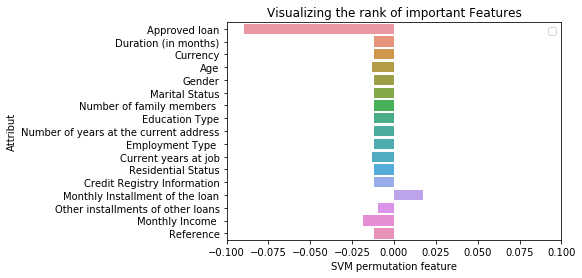

In [133]:
#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=Acc,y=X.columns)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((-0.1, 0.1))
#plt.ylim((0, 1))
plt.xlabel('FSVM Feature Influence')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

 Delete a variable and observe the effect of the variable on accuracy
 For the Loan bank datast, 'Approved loan' ,'Monthly Installment of the loan' and 'Monthly Income' has a greater impact on accuracy. After delete 'Approved loan', the total accuracy greatly increases. And the only feature 'Monthly Installment of the loan', the accuracy will decrease after delete it.

#### LSFSVM

In [187]:
import LS_FSVM
print('LSFSVM')
kernel_dict = {'type': 'LINEAR'}
fuzzyvalue = {'type':'Cen','function':'Exp'}

clf = LS_FSVM.LSFSVM(3,kernel_dict, fuzzyvalue,'UpSampling',1)
m = clf._mvalue(x_train, y_train)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_prob = clf.predict_prob(x_test)

print('accuracy_score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('AUC:', roc_auc_score(y_test, y_pred))

LSFSVM
accuracy_score 0.6988382484361036
              precision    recall  f1-score   support

          -1       0.10      0.41      0.16        79
           1       0.94      0.72      0.82      1040

    accuracy                           0.70      1119
   macro avg       0.52      0.56      0.49      1119
weighted avg       0.88      0.70      0.77      1119

AUC: 0.5631085686465434


In [190]:
Acc1=[]
for col in X.columns:
    print('***************')
    print(col)
    X0 = X.drop([col],axis=1)
    X1 = X0.astype('float64')
    X1 = np.array(X1)
    lable = y.values
    X1 = (X1 - X1.mean())/X1.std()

    data = np.append(X1,y[:,None],axis=1)

    print('Clients %s'%Counter(lable))

    Train_data,test = train_test_split(data, test_size=0.2,shuffle = True,random_state = 10)

    x_test = test[:,:-1]
    x_test = x_test.astype('float')
    y_test = test[:,-1]
    y_test=y_test.astype('int')
    x_train = Train_data[:,:-1]
    x_train = x_train.astype('float')
    y_train = Train_data[:,-1]
    y_train=y_train.astype('int')
    
    kernel_dict = {'type': 'LINEAR'}
    fuzzyvalue = {'type':'Cen','function':'Exp'}

    clf = LS_FSVM.LSFSVM(3,kernel_dict, fuzzyvalue,'UpSampling',1)
    m = clf._mvalue(x_train, y_train)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    print('accuracy_score', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print('AUC:', roc_auc_score(y_test, y_pred))
    Acc1.append( 0.6988-accuracy_score(y_test, y_pred))

***************
Approved loan
Clients Counter({1: 3494, -1: 235})
accuracy_score 0.646112600536193
              precision    recall  f1-score   support

          -1       0.09      0.39      0.14        56
           1       0.93      0.67      0.78       690

    accuracy                           0.65       746
   macro avg       0.51      0.53      0.46       746
weighted avg       0.87      0.65      0.73       746

AUC: 0.5297619047619048
***************
Duration (in months)
Clients Counter({1: 3494, -1: 235})
accuracy_score 0.693029490616622
              precision    recall  f1-score   support

          -1       0.09      0.34      0.14        56
           1       0.93      0.72      0.81       690

    accuracy                           0.69       746
   macro avg       0.51      0.53      0.48       746
weighted avg       0.87      0.69      0.76       746

AUC: 0.5305124223602484
***************
Currency
Clients Counter({1: 3494, -1: 235})
accuracy_score 0.693029490616622

No handles with labels found to put in legend.


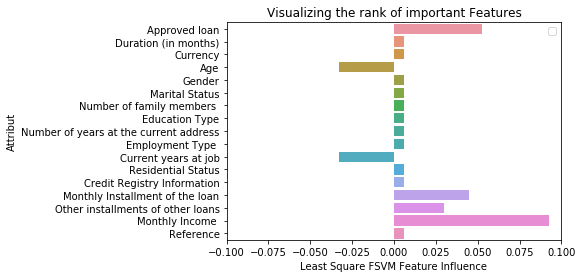

In [192]:
#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=Acc1,y=X.columns)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((-0.1, 0.1))
#plt.ylim((0, 1))
plt.xlabel('Least Square FSVM Feature Influence')
plt.ylabel('Attribut')
plt.title("Visualizing the rank of important Features")
plt.legend()
plt.show()

The figure presents that the accuracy increase after delete feature 'Age' and 'Current years at job'. And 'Approved loan', 'Monthly Installment of the loan' and 'Monthly Income' have also  a great impact on the total accuracy.  
'Credit Registry information' does not have the great impact as we image.